# AI Fake News Detector

####Azaan Fatta, Stone Harward, Juan Ramirez Castrejon, Connor Delk, Dominique Penney

This project aims to build a machine learning model that can classify news headlines as **Fake** or **Real** using natural language processing (NLP). We use the widely known Fake/True News dataset from Kaggle, consisting of two CSV files: `Fake.csv` and `True.csv`.


In [1]:
import pandas as pd
import numpy as np

In [2]:

fake_url = "https://drive.google.com/uc?id=1sQV8Tp5zwnOfdQzEEDh0BsEmn3gGSBVH"
true_url ="https://drive.google.com/uc?id=1Gm_bDcNVSRICLuptLHJfEuNqQoGgKHWW"


In [3]:
# Load the uploaded CSV files into DataFrames
fake = pd.read_csv(fake_url)
true = pd.read_csv(true_url)

print("Fake shape:", fake.shape)
print("True shape:", true.shape)

fake.head(), true.head()


Fake shape: (23481, 4)
True shape: (21417, 4)


(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [4]:
# Add label: 1 = fake, 0 = real
fake["label"] = 1
true["label"] = 0

fake[["title", "label"]].head(), true[["title", "label"]].head()


(                                               title  label
 0   Donald Trump Sends Out Embarrassing New Year’...      1
 1   Drunk Bragging Trump Staffer Started Russian ...      1
 2   Sheriff David Clarke Becomes An Internet Joke...      1
 3   Trump Is So Obsessed He Even Has Obama’s Name...      1
 4   Pope Francis Just Called Out Donald Trump Dur...      1,
                                                title  label
 0  As U.S. budget fight looms, Republicans flip t...      0
 1  U.S. military to accept transgender recruits o...      0
 2  Senior U.S. Republican senator: 'Let Mr. Muell...      0
 3  FBI Russia probe helped by Australian diplomat...      0
 4  Trump wants Postal Service to charge 'much mor...      0)

In [5]:
# Combine fake and real into one DataFrame
df = pd.concat([fake, true], ignore_index=True)

print("Combined shape:", df.shape)
df.head()


Combined shape: (44898, 5)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
# Focus on title (headline) + label only
df = df[["title", "label"]]

df.head()


,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


## Next Steps

- Handle any missing values if needed
- Shuffle the dataset
- Show:
  - Class distribution (fake vs real)
  - A few sample fake and real headlines
- Then move on to train/test split and TF-IDF.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# --- BRIDGING THE GAP (Preprocessing) ---

# 1. Shuffle the dataset (Currently it's all Fake then all True, which is bad for training)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 2. Define Features (X) and Target (y)
# We are using the 'title' column as the feature based on the V1 notebook structure
X = df['title']
y = df['label']

# 3. Split into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Vectorization (TF-IDF)
# Convert text to numbers so the Logistic Regression can understand it
print("Vectorizing data... this may take a moment.")
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("Data processed. Ready for Model Training.")

Vectorizing data... this may take a moment.
Data processed. Ready for Model Training.


In [8]:
# --- Connor's Section: Train/Test Split + TF-IDF Vectorization ---

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Make sure we are only using the columns we care about:
#    - 'title'  -> headline text (feature)
#    - 'label'  -> 0 = real, 1 = fake (target)
df_model = df[["title", "label"]].dropna()

print("Data shape after selecting columns and dropping NaNs:", df_model.shape)

# 2.Shuffle the dataset
df_model = df_model.sample(frac=1, random_state=42).reset_index(drop=True)

# 3. Define Features (X) and Target (y)
X = df_model["title"]   # headlines
y = df_model["label"]   # 0 = real, 1 = fake

# 4. Train/Test Split
#    Use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y    # keeps class balance similar in train and test
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# 5. TF-IDF Vectorization
#    Convert the raw text into numeric vectors that the model can use.
#    - stop_words='english' removes common English words (e.g., "the", "and")
#    - max_df=0.7 ignores extremely common terms that appear in >70% of documents
print("\nFitting TF-IDF vectorizer on training data...")
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("X_train_vectorized shape:", X_train_vectorized.shape)
print("X_test_vectorized shape:", X_test_vectorized.shape)
print("\nTF-IDF vectorization complete. Data is ready for model training.")


Data shape after selecting columns and dropping NaNs: (44898, 2)
Training samples: 35918
Testing samples: 8980

Fitting TF-IDF vectorizer on training data...
X_train_vectorized shape: (35918, 19285)
X_test_vectorized shape: (8980, 19285)

TF-IDF vectorization complete. Data is ready for model training.


In [9]:
# --- DOMINIQUE'S SECTION (Model Training & Evaluation) ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize the Logistic Regression Model
log_reg = LogisticRegression()

# 2. Train the model
print("Training Logistic Regression Model...")
log_reg.fit(X_train_vectorized, y_train)

# 3. Make Predictions
pred_log_reg = log_reg.predict(X_test_vectorized)

# 4. Classification Report
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, pred_log_reg))

Training Logistic Regression Model...

--- Logistic Regression Results ---
Accuracy: 0.9476614699331849

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4284
           1       0.96      0.94      0.95      4696

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



--- DOMINIQUE'S DATA CLEANING ---
Duplicates before cleaning: 6169
Duplicates removed. Final dataset size: (38729, 2)


C:\Users\cosme\AppData\Local\Temp\ipykernel_39688\2665491341.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


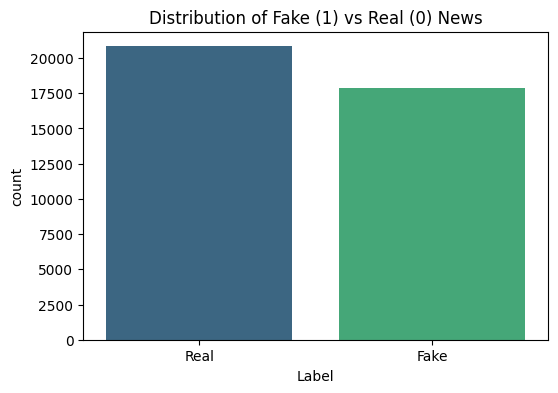


--- SAMPLE REAL HEADLINES ---
['Turkey summons U.S. embassy undersecretary, calls for end to visa dispute: sources'
 "South Korea's Moon says he and Putin share understanding on North Korea"
 "Cambodia's Hun Sen renews criticism of United States amid escalating row"]

--- SAMPLE FAKE HEADLINES ---
['UNREAL! HERE’S WHY ICE RELEASED BUT DIDN’T DEPORT 19,723 Criminal Illegals In 2015 [Video]'
 ' Trump Takes Credit For Republican ‘Win’ In Georgia, And Gets Brutally Humiliated With Math'
 'Gov. Cuomo Defends Not Endorsing Mayor de Blasio…Speaks Up On ‘Offensive Statues’ Of Christopher Columbus']


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ======================================================
#  PART 1: DOMINIQUE'S SECTION (Data Cleaning & EDA)
# ======================================================

# 1. Clean Data
# Removing duplicates is critical so the model doesn't memorize repeated headlines
print("--- DOMINIQUE'S DATA CLEANING ---")
print(f"Duplicates before cleaning: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates removed. Final dataset size: {df.shape}")

# 2. Visualization (Distribution Chart)
# This proves to the group that our dataset is balanced
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Fake (1) vs Real (0) News')
plt.xlabel('Label')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

# 3. Sample Headlines
# Showing the raw text to verify what we are working with
print("\n--- SAMPLE REAL HEADLINES ---")
print(df[df['label'] == 0]['title'].sample(3).values)

print("\n--- SAMPLE FAKE HEADLINES ---")
print(df[df['label'] == 1]['title'].sample(3).values)

In [11]:
# ======================================================
#  PART 2: THE BRIDGE (Preprocessing)
#  (Required to turn Text into Numbers for Juan's Model)
# ======================================================

print("\n--- PREPROCESSING (THE BRIDGE) ---")

# 1. Define Features (X) and Target (y)
X = df['title']
y = df['label']

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Vectorize (TF-IDF)
# Converting English words into Math vectors
print("Vectorizing data... please wait.")
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
print("Data vectorized and ready for training.")


--- PREPROCESSING (THE BRIDGE) ---
Vectorizing data... please wait.
Data vectorized and ready for training.


In [12]:
# ======================================================
#  PART 3: JUAN'S SECTION (Logistic Regression Model)
# ======================================================

print("\n--- JUAN'S MODEL TRAINING ---")

# 1. Initialize and Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_vectorized, y_train)
print("Model trained successfully.")

# 2. Make Predictions
pred_log_reg = log_reg.predict(X_test_vectorized)

# 3. Evaluation Report
print("\n--- LOGISTIC REGRESSION RESULTS ---")
print(f"Accuracy Score: {accuracy_score(y_test, pred_log_reg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, pred_log_reg))


--- JUAN'S MODEL TRAINING ---
Model trained successfully.

--- LOGISTIC REGRESSION RESULTS ---
Accuracy Score: 0.9378

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4170
           1       0.95      0.92      0.93      3576

    accuracy                           0.94      7746
   macro avg       0.94      0.94      0.94      7746
weighted avg       0.94      0.94      0.94      7746

